Questions 1-49 are based on the Amazon Book Dataset. 
Questions 50-108 use artificial data on educational website, structured across six tables: 
Users, Courses, Ratings, Payments, Enrollments, and Refunds ! 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('Book_store.csv')
df.head()

,Book Name,Author,Pages,Language,Ratings,Total Ratings,Price,Category
0,11 Rules For Life: Secrets to Level Up,Chetan Bhagat,256.0,English,4.5,735,183,Self Improvement
1,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature
2,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature
3,21 Lessons for the 21st Century : 'Truly mind-...,Yuval Noah Harari,432.0,English,4.6,"17,463",416,Self Improvement
4,21 Lessons for the 21st Century : 'Truly mind-...,Yuval Noah Harari,432.0,English,4.6,"17,463",416,Self Improvement


**1. Get the names of all the columns**

In [3]:
df.columns

Index(['Book Name', 'Author', 'Pages', 'Language', 'Ratings', 'Total Ratings',
       'Price', 'Category'],
      dtype='object')

**2. Display the first 3 rows**

In [4]:
df.head(3)

,Book Name,Author,Pages,Language,Ratings,Total Ratings,Price,Category
0,11 Rules For Life: Secrets to Level Up,Chetan Bhagat,256.0,English,4.5,735,183,Self Improvement
1,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature
2,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature


**3. Display 4 random rows from the dataframe**

In [5]:
df.iloc[1 : 5 ]

,Book Name,Author,Pages,Language,Ratings,Total Ratings,Price,Category
1,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature
2,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature
3,21 Lessons for the 21st Century : 'Truly mind-...,Yuval Noah Harari,432.0,English,4.6,"17,463",416,Self Improvement
4,21 Lessons for the 21st Century : 'Truly mind-...,Yuval Noah Harari,432.0,English,4.6,"17,463",416,Self Improvement


**4. What is the total number of rows in the dataset?**

In [6]:
df.shape
# there are 320 rows present in the dataset

(320, 8)

**5. Rename 'Ratings' column to 'Average Rating'**

In [7]:
df = df.rename(columns={"Ratings":"Average Ratings"})
df.head()

,Book Name,Author,Pages,Language,Average Ratings,Total Ratings,Price,Category
0,11 Rules For Life: Secrets to Level Up,Chetan Bhagat,256.0,English,4.5,735,183,Self Improvement
1,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature
2,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,"1,26,238",139,Literature
3,21 Lessons for the 21st Century : 'Truly mind-...,Yuval Noah Harari,432.0,English,4.6,"17,463",416,Self Improvement
4,21 Lessons for the 21st Century : 'Truly mind-...,Yuval Noah Harari,432.0,English,4.6,"17,463",416,Self Improvement


**6. Check if there are any duplicate rows**

In [8]:
df.duplicated().sum()
# there are 79 duplicate values 

79

**7. Remove any duplicate rows**

In [9]:
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

**8. Remove rows where 'Average Rating' and 'Total Ratings' are missing**

In [10]:
df = df.dropna(subset=["Average Ratings","Total Ratings"])
df.isna().sum()

Book Name           0
Author              2
Pages              24
Language            5
Average Ratings     0
Total Ratings       0
Price              19
Category            0
dtype: int64

**9. Check the datatype of all the columns**

In [11]:
df.dtypes

Book Name           object
Author              object
Pages              float64
Language            object
Average Ratings    float64
Total Ratings       object
Price               object
Category            object
dtype: object

**10. Remove comma from values in Price column and change the type to float64**

In [12]:
df["Price"] = df["Price"].str.replace(",","")
df["Price"] = df["Price"].astype("Float64")

**11. Remove comma from values in Total Ratings column and change the type to int64**

In [13]:
df["Total Ratings"] = df["Total Ratings"].str.replace(",","")
df["Total Ratings"] = df["Total Ratings"].astype('int64')

**12. Check how many missing values are there in all columns**

In [14]:
df.isnull().sum()

Book Name           0
Author              2
Pages              24
Language            5
Average Ratings     0
Total Ratings       0
Price              19
Category            0
dtype: int64

**13. Replace missing values in Author column with 'Unknown'**

In [15]:
df["Author"] = df["Author"].fillna("Unknown")
df["Author"].isna().sum()

0

**14. Replace missing values in Language column with the most occuring langauge**

In [16]:
import numpy as np
lang_mode = df["Language"].mode()[0]
lang_mode
df["Language"]=df["Language"].fillna(lang_mode)
df["Language"].isna().sum()

0

**15. Replace missing values in Pages column with median and convert data of Pages column type to int64**

In [17]:
pages_median = df["Pages"].median()
df["Pages"] = df["Pages"].fillna(pages_median)
df["Pages"].isna().sum()

0

**16. Fill missing values for price with the median price of the same category**

In [18]:
median_price = df["Price"].median()
df["Price"] = df["Price"].fillna(median_price)
df["Price"].isna().sum()


0

**17. How many unique authors are listed?**

In [19]:
df["Author"].unique().shape

(201,)

**18. What are the top 5 most expensive books?**

In [20]:
top5_book = df.sort_values(by="Price",ascending=False).head(5)
top5_book[["Book Name","Price"]]

,Book Name,Price
67,Dungeons & Dragons Core Rulebooks Gift Set (Sp...,17913.0
222,"The CSB Study Bible For Women, Teal Flowers Le...",6416.0
274,The Woman's Study Bible: New International Ver...,5322.0
144,"Niv, Beautiful Word Bible, Updated Edition, Pe...",5177.0
266,The Silmarillion [Illustrated Edition]: Illust...,4573.0


**19. What are the 5 shortest books (based on the number of pages)?**  


In [21]:
shotes5_book = df.sort_values(by="Pages",ascending=True).head(5)
shotes5_book[["Book Name","Pages"]]

,Book Name,Pages
157,Preschool Activity Book: Brain Booster - Logic...,16.0
189,Star Light: Enchanting Messages from the Cosmo...,40.0
239,The Law,46.0
25,As a Man Thinketh [Paperback] James Allen,50.0
277,Thera-pets: 64 Emotional Support Animal Cards,64.0


**20. What is the average number of pages across all books?**


In [22]:
df["Pages"].mean()

316.6276150627615

**21. Display the summary statistics for numeric columns**



In [23]:
df.describe()

,Pages,Average Ratings,Total Ratings,Price
count,239.000000,239.000000,239.000000,239.0
mean,316.627615,4.573640,8311.062762,621.364017
std,290.225136,0.258664,18992.779955,1402.320504
min,16.000000,3.500000,1.000000,75.0
25%,176.000000,4.400000,283.500000,199.0
50%,256.000000,4.500000,1658.000000,277.0
75%,320.000000,4.750000,5772.500000,483.0
max,2240.000000,5.000000,143173.000000,17913.0


**22. Find the unique values and their counts for the column 'Category', sort by category names**

In [24]:
df['Category'].value_counts(ascending=False)

Category
Literature                  49
Self Improvement            48
Religion and Spirtuality    48
Political                   48
Finance                     46
Name: count, dtype: int64

**23. What are the top 5 languages with the most books listed?**


In [25]:
df.groupby("Language")["Book Name"].count().head(5)

Language
English      215
Hindi         15
Kannada        1
Malayalam      3
Marathi        1
Name: Book Name, dtype: int64

**24. What percentage of books have ratings greater than or equal to 4 stars?**

In [26]:
percanteg = (df[df["Average Ratings"]>=4].shape[0] / df.shape[0] ) * 100
round(percanteg,2)

98.33

**25. What is the average price of books and average number of pages across different languages?**

In [27]:
df.pivot_table(values="Price",index="Language",aggfunc="mean")

,Price
Language,
English,664.716279
Hindi,235.666667
Kannada,153.0
Malayalam,234.0
Marathi,250.0
Tamil,129.0
Telugu,274.333333


**26. What is the average and maximum price of books, along with the average number of pages, across different languages?**

In [28]:
df_lang = df.groupby("Language").agg(
    {"Price": ["mean","max"],
     "Pages":"mean"}
)

**27. How do the average price and average number of pages differ across various languages and categories**

In [29]:
grouped_df = df.groupby(["Language","Category"]).agg(
   { "Price": "mean",
    "Pages" : "mean"}
).reset_index()
grouped_df

,Language,Category,Price,Pages
0,English,Finance,387.105263,251.921053
1,English,Literature,270.432432,397.783784
2,English,Political,376.727273,314.295455
3,English,Religion and Spirtuality,1882.208333,396.145833
4,English,Self Improvement,234.916667,251.354167
5,Hindi,Finance,227.8,239.600000
6,Hindi,Literature,207.0,290.333333
7,Hindi,Political,288.5,345.500000
8,Kannada,Finance,153.0,152.000000
9,Malayalam,Finance,169.0,288.000000


**28. Extract the data for the 'English' language from the previously grouped DataFrame.**

In [30]:
# Extract data for 'English' language
english_data = grouped_df[grouped_df['Language'] == 'English']
english_data

,Language,Category,Price,Pages
0,English,Finance,387.105263,251.921053
1,English,Literature,270.432432,397.783784
2,English,Political,376.727273,314.295455
3,English,Religion and Spirtuality,1882.208333,396.145833
4,English,Self Improvement,234.916667,251.354167


**29. Extract the data for the combination of 'English' language and 'Finance' category from the previously grouped DataFrame.**

In [31]:
grouped_df[(grouped_df["Language"]=="English") & (grouped_df["Category"]=="Finance")]

,Language,Category,Price,Pages
0,English,Finance,387.105263,251.921053


**30. Which price range has the most number of books?**

In [32]:
df["Price"].value_counts().head(1)

Price
277.0    19
Name: count, dtype: Int64

**31. How many books have received more than 1000 ratings?**


In [33]:
df[df["Total Ratings"] >= 1000]

,Book Name,Author,Pages,Language,Average Ratings,Total Ratings,Price,Category
1,1984 [Paperback] George Orwell,George Orwell,304.0,English,4.5,126238,139.0,Literature
3,21 Lessons for the 21st Century : 'Truly mind-...,Yuval Noah Harari,432.0,English,4.6,17463,416.0,Self Improvement
5,33 Days to Morning Glory: A Do-It-Yourself Ret...,Michael E. Gaitley,256.0,English,4.9,3391,277.0,Religion and Spirtuality
7,41 Anmol Kahaniya - Premchand [Paperback] Prem...,Premchand,368.0,Hindi,4.4,2536,199.0,Literature
12,Aapke Avchetan Mann Ki Shakti (The Power Of Yo...,Joseph Murphy,232.0,Hindi,4.4,14553,139.0,Finance
...,...,...,...,...,...,...,...,...
312,World�s Greatest Classic (Set of 4 Books) [Pap...,"Jane Austen F. Scott Fitzgerald, Oscar Wilde, ...",1264.0,English,4.5,2584,499.0,Literature
313,YOU ARE WORTH IT: Building a Life Worth Fighti...,Kyle Carpenter,320.0,English,4.9,2006,599.0,Religion and Spirtuality
314,You Can [Paperback] George Matthew Adams,George Matthew Adams,232.0,English,4.3,5336,129.0,Self Improvement
318,YOU WILL GET THROUGH THIS NIGHT NOTUS NO: The ...,DANIEL HOWELL,352.0,English,4.9,2258,860.0,Religion and Spirtuality


**32. Which book(s) has the highest rating?**


In [34]:
df[["Book Name","Total Ratings"]].sort_values(by="Total Ratings",ascending=False).head()

,Book Name,Total Ratings
270,The Subtle Art of Not Giving A F*ck : A Counte...,143173
1,1984 [Paperback] George Orwell,126238
28,Atomic Habits : the life-changing million-copy...,93585
130,Man's Search For Meaning: The classic tribute ...,85928
131,Man's Search For Meaning: The classic tribute ...,85928


**33. What is the average rating across different languages?**

In [35]:
df.groupby("Language")["Total Ratings"].mean().reset_index()

,Language,Total Ratings
0,English,9094.958140
1,Hindi,1730.333333
2,Kannada,26.000000
3,Malayalam,82.000000
4,Marathi,197.000000
5,Tamil,37.000000
6,Telugu,1489.000000


**34. Which authors have the highest average book ratings?**


In [36]:
df.groupby("Author")["Average Ratings"].mean().sort_values(ascending=False).head(1)

Author
Omar Suleiman    5.0
Name: Average Ratings, dtype: float64

**35. Display the longest book(max pages) written by each author.  Sort the result by Pages in descending order**

In [37]:
df.groupby("Author")["Pages"].max().sort_values(ascending=False).head()

Author
CSB Bibles by Holman CSB Bibles by Holman    2240.0
Dorothy Kelley Patterson                     2080.0
Zondervan Publishing House                   1666.0
Various                                      1536.0
Unknown                                      1448.0
Name: Pages, dtype: float64

**36. Display the total number of ratings received by each author.**



In [38]:
df.groupby("Author")["Total Ratings"].sum()

Author
ASHNEER GROVER                 3221
Abbie Halberstadt              1353
Abhay Xaxa                       31
Abiola Abrams                  3090
Acharya Prashant               1392
                              ...  
Wonder House Books              169
Yatish Yadav                    579
Yuval Noah Harari             17463
Zebra Learn                     181
Zondervan Publishing House     6257
Name: Total Ratings, Length: 201, dtype: int64


**37. Find top 5 and bottom 5 authors based on total number of ratings received**

In [39]:
df1 = df.groupby("Author")["Total Ratings"].sum().sort_values(ascending=False).head()
df2 = df.groupby("Author")["Total Ratings"].sum().sort_values(ascending=True).head()
df3 = pd.concat([df1, df2])
df3

Author
George Orwell          285670
Victor E. Frankl       171856
Mark Manson            143173
James Clear             93585
Robin Sharma            86609
Indrazith Santharaj         1
Martin Rowson               1
Jay Sandron                 1
Na. Vanamamalai             2
J. Krishnamurti             4
Name: Total Ratings, dtype: int64

**38. Find the top 10 books with the highest number of total ratings.**


In [40]:
df[["Book Name","Total Ratings"]].sort_values(by ="Total Ratings",ascending=False).head(10)

,Book Name,Total Ratings
270,The Subtle Art of Not Giving A F*ck : A Counte...,143173
1,1984 [Paperback] George Orwell,126238
28,Atomic Habits : the life-changing million-copy...,93585
130,Man's Search For Meaning: The classic tribute ...,85928
131,Man's Search For Meaning: The classic tribute ...,85928
18,Animal Farm,79675
17,Animal Farm,79674
259,The Psychology of Money,62884
107,Ikigai,54433
225,The Good Girl's Guide to Murder: Book 1 (A Goo...,52516


**39. Explore how many books exist in each category and language combination.**

In [41]:
df.groupby(["Category","Language"]).agg({"Book Name":"count"})

Book Name
Category                 Language            
Finance                  English           38
                         Hindi              5
                         Kannada            1
                         Malayalam          1
                         Tamil              1
Literature               English           37
                         Hindi              6
                         Malayalam          2
                         Marathi            1
                         Telugu             3
Political                English           44
                         Hindi              4
Religion and Spirtuality English           48
Self Improvement         English           48

**40 Identify the longest and shortest books by pages within each category.**

In [42]:
df.groupby("Category").agg({"Pages":["min","max"]})

Pages        
                           min     max
Category                              
Finance                   82.0   590.0
Literature                16.0  1536.0
Political                 46.0   784.0
Religion and Spirtuality  40.0  2240.0
Self Improvement          96.0   512.0

**41. Plot a boxplot of the "Pages" column**

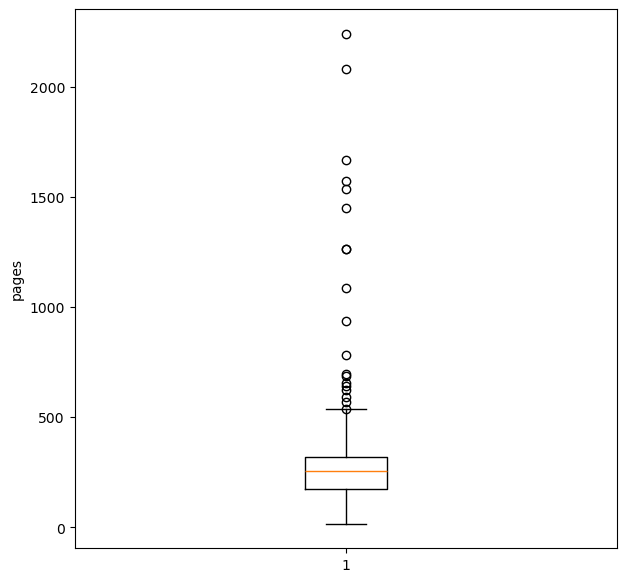

In [43]:
x = df["Pages"]

plt.figure(figsize=(7,7))
plt.boxplot(x)
plt.ylabel("pages")
plt.show()

**42. Plot a boxplot of the "Price" column**

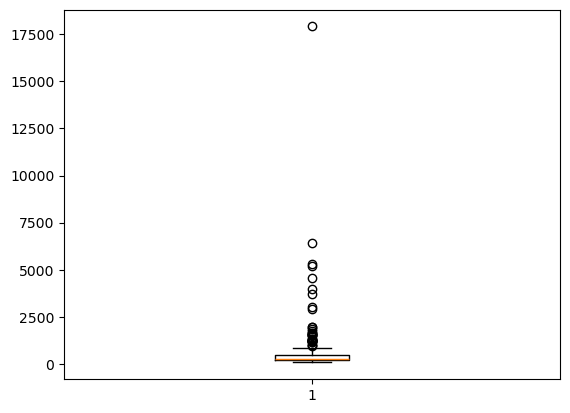

In [44]:
plt.boxplot(df["Price"])
plt.show()

**43. Use the following function to remove outliers from Price and Pages column. Find the number of rows removed and plot boxplots for Price and Pages after removing the oultiers**

In [45]:
def remove_outliers(df, column, multiplier=1.5):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) of the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Remove outliers by filtering the column within the bounds
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

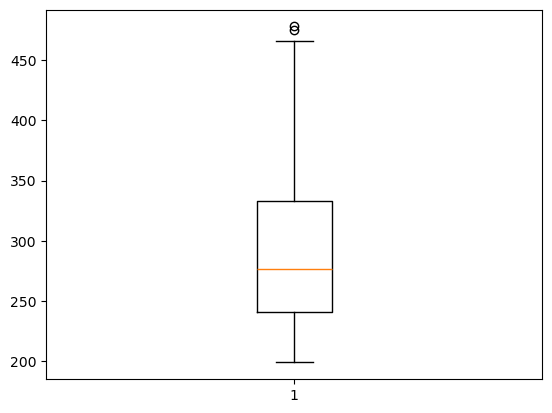

In [46]:

df_cleaned_price = remove_outliers(df,column="Price",multiplier=0.0)
plt.boxplot(df_cleaned_price["Price"])
plt.show()

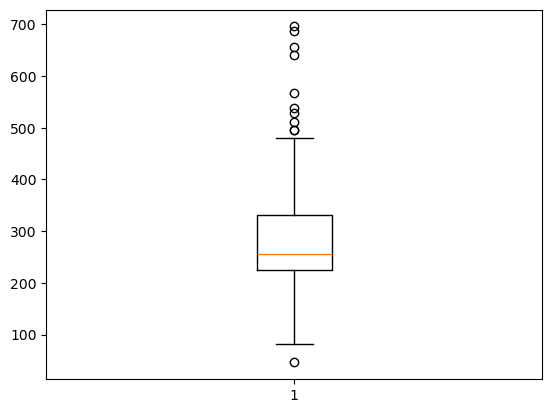

In [47]:
df_cleaned_pages = remove_outliers(df,column="Pages",multiplier=0.0)
plt.boxplot(df_cleaned_price["Pages"])
plt.show()

**44. Compare the distribution of book prices across different categories using box plots.**


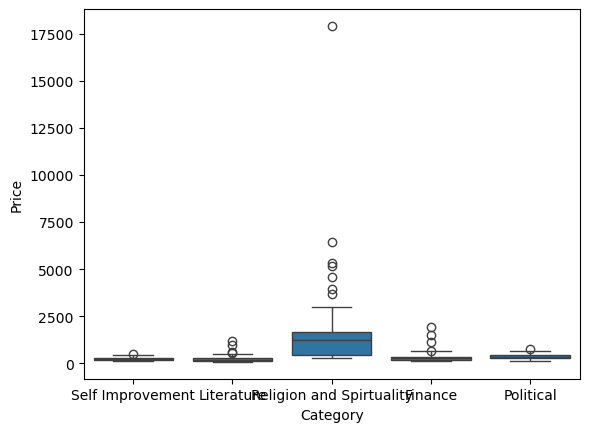

In [48]:
import seaborn as sns
x = df["Price"]
y = df["Category"]

sns.boxplot(x=y,y=x,data=df)
plt.show()

**45. Explore how the average rating varies across different languages using a bar plot**


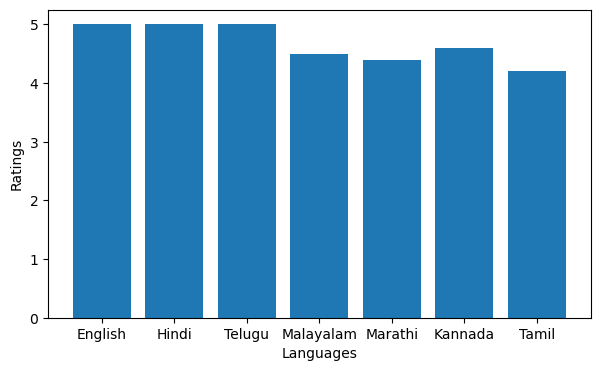

In [49]:
plt.figure(figsize=(7,4))
plt.bar(df["Language"],df["Average Ratings"])
plt.xlabel("Languages")
plt.ylabel("Ratings")
plt.show()

**46. Analyze the correlation between numerical variables such as Price, Pages, Average Rating, Total Ratings, etc.**

In [50]:
correlation = df.corr(numeric_only=True)
correlation

,Pages,Average Ratings,Total Ratings,Price
Pages,1.000000,0.084830,-0.063443,0.359610
Average Ratings,0.084830,1.000000,-0.032714,0.298285
Total Ratings,-0.063443,-0.032714,1.000000,-0.023572
Price,0.359610,0.298285,-0.023572,1.000000


**47. Visualize the correlation between book price and number of pages.**

<Axes: >

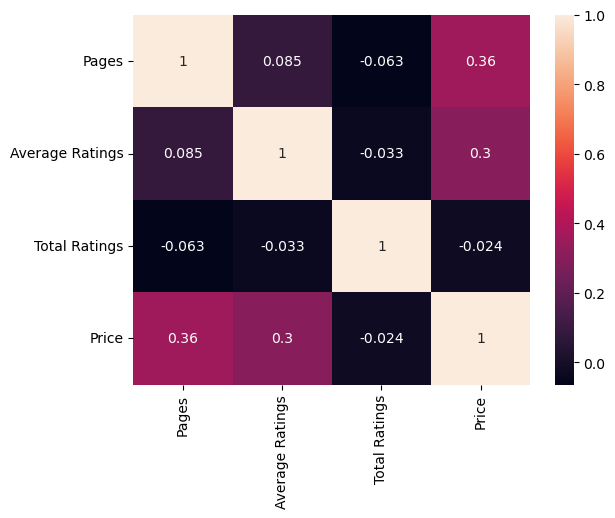

In [51]:
sns.heatmap(correlation,annot=True)

**48. Plot a histogram for the distribution of ratings**

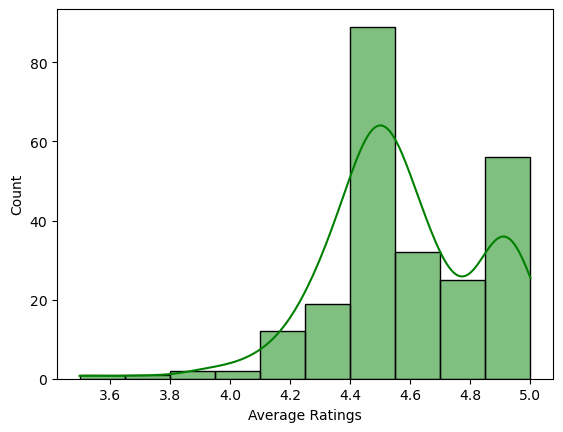

In [52]:
sns.histplot(df["Average Ratings"],bins=10,kde=True,color="green")
plt.show()

**49. Draw a line plot to show average price for each rating level**

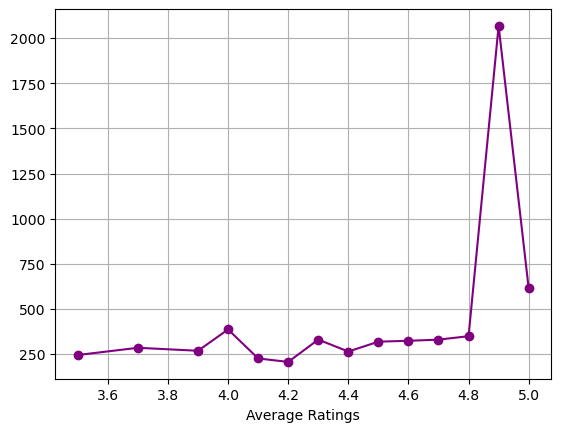

In [53]:
avg_price = df.groupby("Average Ratings")["Price"].mean()
avg_price.plot(kind="line",marker='o',color="purple")
plt.grid()
plt.show()

# Educational Website 

In [54]:
# Read all CSV files into DataFrames
users_df = pd.read_csv("users.csv",parse_dates=['date_of_birth','registration_date'], dayfirst=True)
courses_df = pd.read_csv("courses.csv",parse_dates=['created_on','last_updated_on'], dayfirst=True)
ratings_df = pd.read_csv("ratings.csv",parse_dates=['first_reviewed_on','last_updated_on'], dayfirst=True)
enrollments_df = pd.read_csv("enrollments.csv",parse_dates=['enrollment_date'], dayfirst=True)
payments_df = pd.read_csv("payments.csv",parse_dates=['transaction_date'], dayfirst=True)
refunds_df = pd.read_csv("refunds.csv",parse_dates=['refund_date'], dayfirst=True)

In [55]:
print("Users DataFrame columns:", users_df.columns.tolist(), "\n")
print("Courses DataFrame columns:", courses_df.columns.tolist(), "\n")
print("Ratings DataFrame columns:", ratings_df.columns.tolist(), "\n")
print("Enrollments DataFrame columns:", enrollments_df.columns.tolist(), "\n")
print("Payments DataFrame columns:", payments_df.columns.tolist(), "\n")
print("Refunds DataFrame columns:", refunds_df.columns.tolist(), "\n")

Users DataFrame columns: ['user_id', 'name', 'date_of_birth', 'email', 'gender', 'category', 'registration_date', 'country', 'last_login_date', 'user_type'] 

Courses DataFrame columns: ['course_id', 'title', 'category', 'language', 'subtitles', 'price', 'instructor_id', 'length', 'difficulty_level', 'created_on', 'last_updated_on', 'number_of_videos', 'number_of_quizzes', 'view_count', 'average_watch_duration', 'certification_available', 'completion_rate', 'bookmark_count'] 

Ratings DataFrame columns: ['review_id', 'course_id', 'student_id', 'rating', 'review_text', 'first_reviewed_on', 'last_updated_on', 'helpful_count', 'reported_count'] 

Enrollments DataFrame columns: ['enrollment_id', 'student_id', 'course_id', 'enrollment_date'] 

Payments DataFrame columns: ['payment_id', 'enrollment_id', 'discount_percent', 'amount_paid', 'coupon_code', 'payment_method', 'transaction_date', 'transaction_id', 'payment_status'] 

Refunds DataFrame columns: ['refund_id', 'enrollment_id', 'refund

**50. How many courses are free and how many courses have a price associated with them?**


In [56]:
free_course = (courses_df['price']==0).sum()
paid_courses = (courses_df['price']>0).sum()
print(f" the free courser are {free_course}, and the paid courses are {paid_courses}")

 the free courser are 18, and the paid courses are 45


**51. How many courses is each instructor teaching on the platform?**

In [57]:
courses_df.groupby("instructor_id")["course_id"].count().sort_values(ascending=False)

instructor_id
457246    6
871007    5
220585    5
668495    4
536923    4
838186    3
767050    3
751788    3
712134    3
582060    3
525207    3
278667    3
204568    2
632410    2
742878    2
288315    2
764597    2
173468    2
424379    1
417012    1
370558    1
364202    1
295438    1
241479    1
Name: course_id, dtype: int64

**52. Which courses are the most popular based on the number of bookmarks?**

In [58]:
courses_df.groupby("title")["bookmark_count"].sum().sort_values(ascending=False)

title
Genetics: From DNA to Evolution                         485
Python Masterclass                                      476
Physics Made Simple: Fundamentals to Advanced           458
Instructional Design for Online Learning                452
Leadership and Strategic Management                     450
                                                       ... 
Gamification in Education                                34
Anatomy and Physiology: Understanding the Human Body     34
Project Management: From Initiation to Execution         32
First Aid and CPR Certification                          32
Developing Curriculum for K-12 Education                  4
Name: bookmark_count, Length: 63, dtype: int64

**53. How many users are registered in each user category (e.g., Working, Student, Homemaker, Retired)?**

In [59]:
merge_df = users_df.merge(courses_df,how="left",on="category")
merge_df.groupby("category")["user_id"].count()

category
homemaker    744
retired      766
student      717
working      715
Name: user_id, dtype: int64

**54. What is the male-to-female ratio among the users?**

In [60]:
males = (users_df["gender"]=="male").sum()
females = (users_df["gender"]=="female").sum()
ratio = males/females
ratio

1.520994001713796

**55. Which courses have the worst completion rates?**


In [61]:
courses_df.sort_values(by="completion_rate",ascending=True).head(1)

,course_id,title,category,language,subtitles,price,instructor_id,length,difficulty_level,created_on,last_updated_on,number_of_videos,number_of_quizzes,view_count,average_watch_duration,certification_available,completion_rate,bookmark_count
27,27431,Biology: Understanding the Human Body,Science and Mathematics,English,yes,188,751788,10:27,Advanced,2021-04-07,2025-01-02,85,15,9821,01:43,yes,12.52,163


**56. What is the most common rating given by students?**

In [62]:
comman_rating = ratings_df["rating"].mode()[0]
comman_rating

5

**57. How many unique users are enrolled in at least one course?**

In [63]:
enrollments_df[["enrollment_id","course_id"]].nunique()

enrollment_id    277
course_id         45
dtype: int64

**58. How many users are enrolled in multiple courses?**

In [64]:
user_course_count = enrollments_df.groupby("student_id")["course_id"].nunique()
multi_course_count = user_course_count[user_course_count>1]
print(f"the numeber of user enrolled in multiple courses is  {multi_course_count.count()}")



the numeber of user enrolled in multiple courses is  14


**59. Which 5 courses have the most enrollments?**

In [65]:
top_5_course = enrollments_df["course_id"].value_counts().head()
top_5_course

course_id
76064    20
64796    19
92956    18
79177    18
13258    15
Name: count, dtype: int64

**60. Find the total revenue generated from successful payments.**

In [66]:
total_revenue = payments_df["amount_paid"].sum()
print(f"the Total Revenue is {total_revenue}")

the Total Revenue is 4009.0


**61. What is the average discount percentage applied across all discounted payments?**

In [67]:
avg_discount = payments_df["discount_percent"].mean()
payments_df.groupby("payment_method")["discount_percent"].mean()

payment_method
PayPal    12.000000
UPI       13.947368
card      14.545455
Name: discount_percent, dtype: float64

**62. Find top 3 countries with the highest number of students**

In [68]:
student_df = users_df[users_df["category"]=="student"]
student_df["country"].value_counts().head(3)

country
India    287
US       202
China    119
Name: count, dtype: int64

**63. What is the most common reasons for refunds?**

In [69]:
refunds_df["refund_reason"].mode()

0    Course content not satisfactory
1                Enrolled by mistake
Name: refund_reason, dtype: object

**64. Add an age column to the users table and then calculate average age of the students on the website**

In [70]:
from datetime import datetime
current_date = datetime.today().year
users_df["age"] = current_date - users_df["date_of_birth"].dt.year
avg_age = users_df["age"].mean()
print(f"the average age of the students is {int(avg_age)}")


the average age of the students is 42


**65. Find average age of the students in each course**

In [71]:
merge_df1 = pd.merge(users_df,enrollments_df,left_on="user_id",right_on="student_id",how="left")
merge_df1.groupby("course_id")["age"].mean().reset_index()

,course_id,age
0,13258.0,42.600000
1,18426.0,40.769231
2,20195.0,52.000000
3,21108.0,38.714286
4,21248.0,39.500000
5,22005.0,70.000000
6,27385.0,47.500000
7,27431.0,16.500000
8,30371.0,42.533333
9,30790.0,48.000000


**66. Find average age of the students in each course category**

In [72]:
ave_age_per_catgory = enrollments_df.merge(users_df[["user_id","age"]],left_on="student_id",right_on="user_id").merge(courses_df[["course_id","category"]],on="course_id").groupby("category")["age"].mean()
ave_age_per_catgory

category
Arts and Design               44.550000
Business and Management       43.500000
Education                     40.366197
Health                        43.971429
Personal Development          65.500000
Science and Mathematics       40.767442
Technology and Programming    42.333333
Name: age, dtype: float64

**67. Calculate the average age of users for each user category (e.g., Working, Student, Homemaker, Retired)**


In [73]:
users_df.groupby("category")["age"].mean()

category
homemaker    42.822581
retired      42.556136
student      42.043236
working      42.958042
Name: age, dtype: float64

**68. Plot the age distribution of all the users**

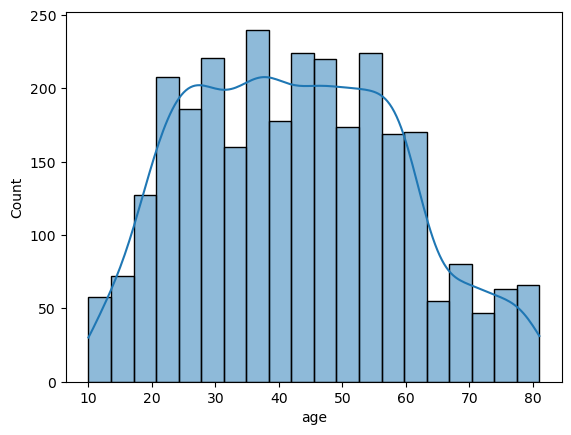

In [74]:
import seaborn as sns
sns.histplot(users_df["age"],kde=True)
plt.show()

**69. Plot the gender distribution to understand the gender breakdown of users**

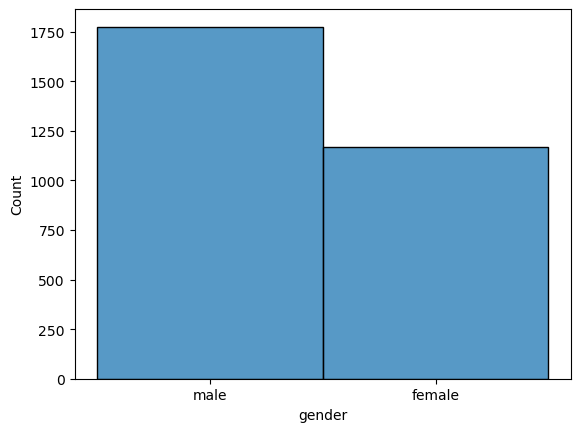

In [75]:
sns.histplot(users_df["gender"])
plt.show()

**70. Plot the geographic distribution of users (based on country)**

C:\Users\prash\AppData\Local\Temp\ipykernel_10164\3695258807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.index,y=country_count.values,palette="viridis")


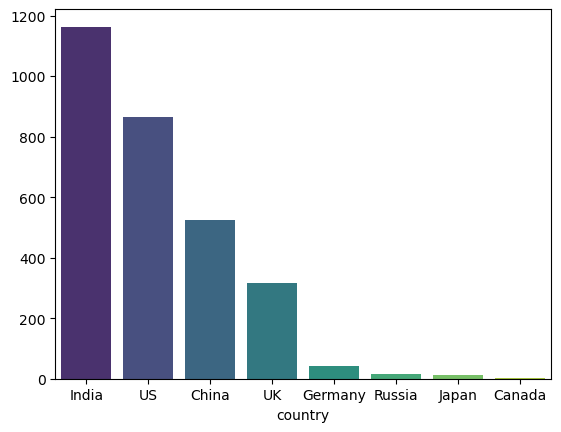

In [76]:
country_count = users_df["country"].value_counts()
sns.barplot(x=country_count.index,y=country_count.values,palette="viridis")
plt.show()

**71. Show how the age distribution varies for different user types.**

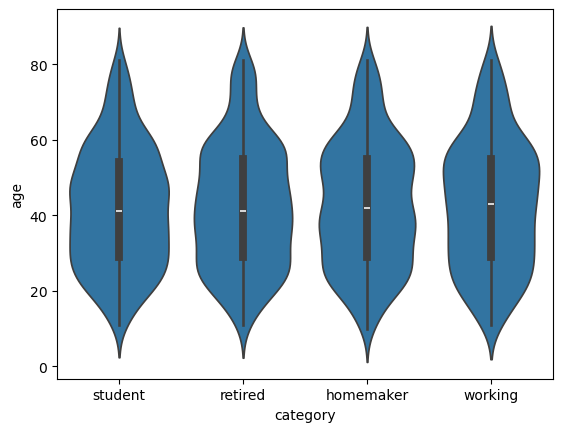

In [77]:
sns.violinplot(x=users_df["category"],y=users_df["age"])
plt.show()

**72. Find the top 5 most popular courses based on view counts**

In [78]:
courses_df.head()
courses_df.groupby("title")["view_count"].sum().sort_values(ascending=False).head(5)

title
Full-Stack Web Development Bootcamp      9989
Biology: Understanding the Human Body    9821
Mastering React: Advanced Concepts       9445
Marine Biology: Life Under the Sea       9320
Genetics: From DNA to Evolution          9230
Name: view_count, dtype: int64

**73. Find the top 2 popular courses in each category based on view counts**

In [79]:
courses_df.groupby("category")["view_count"].sum().sort_values(ascending=False).head(2)

category
Science and Mathematics       76855
Technology and Programming    71155
Name: view_count, dtype: int64

**74. What is the average course duration per category.**

In [80]:
courses_df["length"] = courses_df["length"].str.replace(":",".")
courses_df["length"] = courses_df["length"].astype(float)
courses_df.groupby("category")["length"].mean()

category
Arts and Design                7.852000
Business and Management        6.894000
Education                      8.081818
Health                        11.732000
Personal Development           9.886000
Science and Mathematics       11.333077
Technology and Programming    12.294286
Name: length, dtype: float64

**75. Find the top 5 highest revenue generating courses**

In [81]:
payments_df.head()
revenue = payments_df.merge(enrollments_df,on="enrollment_id")
revenue.groupby("course_id")["amount_paid"].sum().sort_values(ascending=False).head()

course_id
64561    345.80
78724    335.80
56446    295.25
21248    278.00
62660    249.00
Name: amount_paid, dtype: float64

**76. What is the average transaction amount for each payment method.**

In [82]:
payments_df.groupby("payment_method")["amount_paid"].mean()

payment_method
PayPal    81.346667
UPI       89.202632
card      99.450000
Name: amount_paid, dtype: float64

**77. Calulate the average rating for each course and add a column average_rating in courses_df**

In [83]:
avg_course_ratings = ratings_df.groupby("course_id")["rating"].mean()
courses_df["Average Ratings"] = courses_df["course_id"].map(avg_course_ratings).round(1)
courses_df.head()

,course_id,title,category,language,subtitles,price,instructor_id,length,difficulty_level,created_on,last_updated_on,number_of_videos,number_of_quizzes,view_count,average_watch_duration,certification_available,completion_rate,bookmark_count,Average Ratings
0,54145,Data structures through C++,Technology and Programming,English,no,0,668495,10.16,Beginner,2020-11-18,2025-01-09,28,9,514,00:41,yes,43.71,188,4.0
1,45770,Advanced Mathematics for Engineers,Science and Mathematics,English,yes,0,767050,20.28,Intermediate,2020-10-04,2025-01-07,23,8,7570,08:12,no,46.27,83,NaN
2,33057,Advanced Data structures through Python,Technology and Programming,Hindi,yes,0,220585,11.35,Intermediate,2021-11-16,2025-01-14,57,4,5265,12:35,yes,44.74,165,4.4
3,64796,First Aid and CPR Certification,Health,English,yes,0,871007,10.20,Advanced,2020-08-24,2025-01-08,82,1,8483,01:46,no,20.55,32,4.0
4,51293,Managing Diabetes and Chronic Diseases,Health,English,yes,0,278667,8.05,Intermediate,2020-03-07,2025-01-15,55,10,1429,13:21,no,49.40,279,3.4


**78. Find 2 top rated courses in each course category**

In [84]:
top_courses = courses_df.groupby("category").apply(lambda x : x.nlargest(2,"Average Ratings")).reset_index(drop=True)
top_courses[["category","title","Average Ratings"]]

C:\Users\prash\AppData\Local\Temp\ipykernel_10164\3916624009.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_courses = courses_df.groupby("category").apply(lambda x : x.nlargest(2,"Average Ratings")).reset_index(drop=True)


,category,title,Average Ratings
0,Arts and Design,Photography: From Beginner to Pro,5.0
1,Arts and Design,Graphic Design Essentials: Tools and Techniques,4.7
2,Business and Management,Entrepreneurship 101: Building Your First Startup,5.0
3,Business and Management,Financial Analysis for Decision-Making,4.3
4,Education,Childhood Education Fundamentals,4.8
5,Education,Early Childhood Education Fundamentals,4.5
6,Health,Anatomy and Physiology: Understanding the Huma...,5.0
7,Health,Introduction to Medical Terminology,4.5
8,Personal Development,The Art of Negotiation and Persuasion,4.5
9,Personal Development,Public Speaking and Communication Mastery,4.0


**79. Display the average rating of each course category**

In [85]:
courses_df.groupby("category")["Average Ratings"].mean().round(1)

category
Arts and Design               4.4
Business and Management       4.3
Education                     4.0
Health                        4.2
Personal Development          3.5
Science and Mathematics       4.0
Technology and Programming    4.0
Name: Average Ratings, dtype: float64

**80. Calculate the average rating for each instructor.**


In [86]:
instructor_id = courses_df.groupby("instructor_id")["Average Ratings"].mean().reset_index()
instructor_id

,instructor_id,Average Ratings
0,173468,3.250000
1,204568,4.100000
2,220585,4.300000
3,241479,4.100000
4,278667,3.566667
5,288315,3.750000
6,295438,4.000000
7,364202,4.300000
8,370558,4.500000
9,417012,3.800000


**81. Display courses with no ratings**

In [87]:
no_rating_courses = courses_df[courses_df["Average Ratings"].isnull()]
no_rating_courses[["title","Average Ratings"]]

,title,Average Ratings
1,Advanced Mathematics for Engineers,NaN
24,Physics Made Simple: Fundamentals to Advanced,NaN
28,Introduction to Astrophysics,NaN
44,Mental Health Awareness and Support,NaN


**82. Find courses that have no students enrolled in them**

In [88]:
enrollment_course = enrollments_df["course_id"].unique()
no_enrollment_course = courses_df[~courses_df["course_id"].isin(enrollment_course)]
no_enrollment_course.title


18    Entrepreneurship 101: Building Your First Startup
21         Python for Data Science and Machine Learning
24        Physics Made Simple: Fundamentals to Advanced
25                            Data structures through C
28                         Introduction to Astrophysics
30                Climate Change: Science and Solutions
31               Biotechnology: Applications and Impact
33                   Marine Biology: Life Under the Sea
37                    Mindfulness and Stress Management
38            Public Speaking and Communication Mastery
41               Time Management for Busy Professionals
43                           Data structures through C#
44                  Mental Health Awareness and Support
47    Anatomy and Physiology: Understanding the Huma...
51                  Introduction to Medical Terminology
55                         Data structures through Java
61             Developing Curriculum for K-12 Education
62                     Childhood Education Funda

**83. Find the number of students from each country based on their enrollments.**


In [89]:
student_df = users_df[users_df["category"]=="student"]
student_df.merge(enrollments_df,left_on="user_id",right_on="student_id").groupby("country")["student_id"].count()

country
China    20
India    26
UK       11
US       16
Name: student_id, dtype: int64

**84. Get the course popularity details by country i.e. find the course with the highest number of students in each country.**

In [90]:
course_popularity = enrollments_df[["student_id","course_id"]].merge(users_df[["user_id","country"]],left_on="student_id",right_on="user_id").groupby(["country","course_id"]).size().reset_index(name="enrollemnt_count")
course_popularity.loc[course_popularity.groupby("country")["enrollemnt_count"].idxmax()]

,country,course_id,enrollemnt_count
9,China,49963,5
25,Germany,27385,1
59,India,93619,9
74,UK,64796,5
94,US,64796,8


**85. Find the top 5 bestselling paid courses**

In [91]:
bestselling_courses = enrollments_df.merge(payments_df[payments_df["amount_paid"]>0],on="enrollment_id").groupby("course_id")["amount_paid"].sum().nlargest(5).reset_index()
bestselling_courses

,course_id,amount_paid
0,64561,345.80
1,78724,335.80
2,56446,295.25
3,21248,278.00
4,62660,249.00


In [92]:
payments_df.head(1)

,payment_id,enrollment_id,discount_percent,amount_paid,coupon_code,payment_method,transaction_date,transaction_id,payment_status
0,217816,639069,20,64.8,GITHUB34,card,2025-01-09,710cb8b1-4783-471e-a87a-70171576bf26,success


**86. Find the bestselling course in each category**

In [93]:
top_saling_courses = enrollments_df.merge(payments_df,on="enrollment_id").merge(courses_df).groupby(["course_id","category"])["amount_paid"].sum().reset_index()
top_saling_courses.loc[top_saling_courses.groupby("category")["amount_paid"].idxmax()]

,course_id,category,amount_paid
15,64561,Arts and Design,345.80
18,78724,Education,335.80
25,96323,Health,173.70
26,99133,Personal Development,99.00
14,62660,Science and Mathematics,249.00
10,56446,Technology and Programming,295.25


**87. Calculate the number of free enrollments and paid enrollments**

In [94]:
course_enrollments = courses_df.merge(enrollments_df[["course_id","enrollment_id"]],on="course_id",how="right")
free_course = (course_enrollments["price"]==0).sum()
paid_course = (course_enrollments["price"]>0).sum()
print(f"there are  {free_course} free courses and {paid_courses} paid course which are enrolled by people")

there are  234 free courses and 45 paid course which are enrolled by people


**88. Find correlation between the number of videos and the completion_rate.**

In [95]:
videodf = courses_df[["number_of_videos","completion_rate"]]
videodf.corr()

,number_of_videos,completion_rate
number_of_videos,1.000000,-0.066153
completion_rate,-0.066153,1.000000


**89. Find the correlation between number of Quizzes and average rating for each course**

In [96]:
course_rating_df = courses_df.groupby(["course_id","number_of_quizzes"])["Average Ratings"].mean().reset_index()
course_rating_df[["number_of_quizzes","Average Ratings"]].corr()

,number_of_quizzes,Average Ratings
number_of_quizzes,1.000000,-0.210402
Average Ratings,-0.210402,1.000000


**90. How many payment transactions failed using paypal**

In [97]:
(payments_df["payment_method"]=="PayPal").sum()

15

**91. Get a summary of payment methods, including how many successful, failed or pending payments are there for each method.**

In [98]:
payments_df.pivot_table(columns="payment_status",index="payment_method",aggfunc="size").fillna(0)

payment_status,failed,pending,success
payment_method,,,
PayPal,1.0,0.0,14.0
UPI,0.0,1.0,18.0
card,0.0,0.0,11.0


**92. Display the courses that were never refunded**

In [99]:
refunded_enroll= courses_df.merge(enrollments_df,on="course_id").merge(refunds_df,on="enrollment_id",how="left")
non_refunded_courses = refunded_enroll[refunded_enroll.refund_id.isna()]
non_refunded_courses[["course_id", "title"]].drop_duplicates()


,course_id,title
0,54145,Data structures through C++
9,45770,Advanced Mathematics for Engineers
14,33057,Advanced Data structures through Python
26,64796,First Aid and CPR Certification
45,51293,Managing Diabetes and Chronic Diseases
56,49963,How to Teach Reading and Writing Effectively
69,93619,Environmental Science: Understanding Ecosystems
84,30371,Introduction to Quantum Physics
100,18426,Creative Writing: Crafting Compelling Stories
112,21108,Teaching Strategies for the 21st Century


**93. Use box plot to plot distribution of completion rates by difficulty level.**

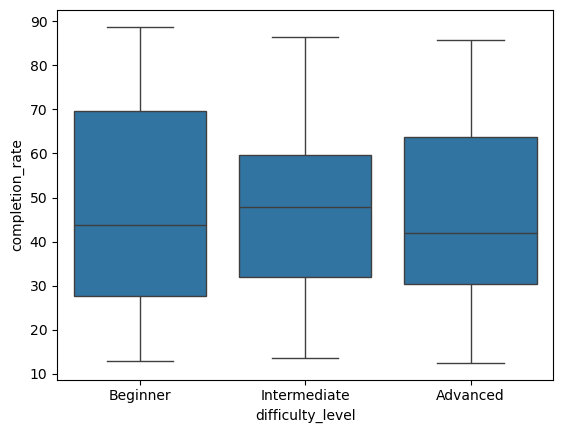

In [100]:
sns.boxplot(x=courses_df["difficulty_level"],y=courses_df["completion_rate"])
plt.show()


**94. Identify the course category with the most enrollments**

In [101]:
import numpy as np
courses_df["category"].mode()

0    Technology and Programming
Name: category, dtype: object

**95. Find the number of inactive users - users who have not logged in during the last 30 days.**

In [102]:
from datetime import  datetime, timedelta

users_df["last_login_date"] = pd.to_datetime(users_df["last_login_date"])

threshold_date = datetime.now() - timedelta(days=30)

inactive_user_count = users_df[users_df["last_login_date"]< threshold_date].shape[0]
inactive_user_count

C:\Users\prash\AppData\Local\Temp\ipykernel_10164\2887685345.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  users_df["last_login_date"] = pd.to_datetime(users_df["last_login_date"])


2851

**96. What is the average price of courses in each category? (exclude the free courses)**

In [103]:
course_info = courses_df.merge(enrollments_df[["enrollment_id","course_id"]],on="course_id",how="inner").merge(payments_df,on="enrollment_id",how="right")
course_info.groupby("category")["amount_paid"].mean()

category
Arts and Design               93.914286
Education                     83.518750
Health                        99.150000
Personal Development          75.600000
Science and Mathematics       92.125000
Technology and Programming    81.615385
Name: amount_paid, dtype: float64

**97. How many courses are available with subtitles?**

In [104]:
courses_with_subtitle  = courses_df[courses_df["subtitles"]=="yes"]
courses_with_subtitle["title"].drop_duplicates()

1                    Advanced Mathematics for Engineers
2               Advanced Data structures through Python
3                       First Aid and CPR Certification
4                Managing Diabetes and Chronic Diseases
5          How to Teach Reading and Writing Effectively
6       Environmental Science: Understanding Ecosystems
7                       Introduction to Quantum Physics
8         Creative Writing: Crafting Compelling Stories
9              Teaching Strategies for the 21st Century
10         Classroom Management: Techniques for Success
11             Instructional Design for Online Learning
12               Early Childhood Education Fundamentals
13                                   Python Masterclass
14                        Digital Marketing Masterclass
16               Financial Analysis for Decision-Making
17     Project Management: From Initiation to Execution
18    Entrepreneurship 101: Building Your First Startup
19      Graphic Design Essentials: Tools and Tec

**98. What percentage of courses offer certifications?**

In [105]:
total_courses = courses_df.shape[0]
courses_with_certification =courses_df[courses_df["certification_available"]=="yes"].shape[0]
percentege_of_certification_avalabe = round((courses_with_certification/total_courses)*100,2)
percentege_of_certification_avalabe

66.67

**99. What is the average time gap between a user's registration date and their first enrollment date?**

In [106]:
# users_df.merge(enrollments_df,on="course_id")
user_enrollments = users_df.merge(enrollments_df,left_on="user_id",right_on="student_id")
day_gap = user_enrollments["enrollment_date"]- user_enrollments["registration_date"] 
day_gap.mean()


Timedelta('937 days 09:42:14.296028880')

In [107]:
days_gap =enrollments_df["enrollment_date"] - users_df["registration_date"] 
days_gap.mean()

Timedelta('898 days 13:30:58.483754512')

**100. Get the email addresses and names of users who have signed up but have not enrolled in any course.**

In [108]:
unenrooled_user = users_df[~users_df["user_id"].isin(enrollments_df["student_id"])]
unenrooled_user[["name","email"]]

,name,email
0,Allison Hill,garzaanthony@robinson.org
1,George Davis,lindsay78@gmail.com
2,Mark Diaz,jacqueline19@jackson.biz
3,Thomas Ellis,julie69@cox-osborn.com
4,Alexandra Le,cartereric@gmail.com
...,...,...
2937,Stacy Russell,williamhill@gmail.com
2938,Tammy Marsh DDS,rebeccahunt@yahoo.com
2939,Kevin Floyd,andrew73@rodriguez.org
2940,Nancy Galloway,hjohnston@shields-sanchez.net


**101. Find the customers who are refunding without any reason**

In [109]:
no_reason_refund = refunds_df[refunds_df["refund_reason"].isna() | (refunds_df["refund_reason"]==" ")]
no_reason_refund

,refund_id,enrollment_id,refund_date,refund_reason,refund_amount
2,773858,625488,2025-01-15,NaN,10
7,984653,990338,2025-01-16,NaN,6
8,477922,203994,2025-01-16,NaN,7
10,101561,127363,2025-01-02,NaN,4


**102. Analyze monthly new user growth to understand monthly trends**

In [110]:
users_df["Month"] = users_df["registration_date"].dt.month
user_count = users_df.groupby("Month")["user_id"].count().reset_index()
user_count

,Month,user_id
0,1,291
1,2,231
2,3,260
3,4,266
4,5,241
5,6,217
6,7,256
7,8,231
8,9,228
9,10,248


<BarContainer object of 12 artists>

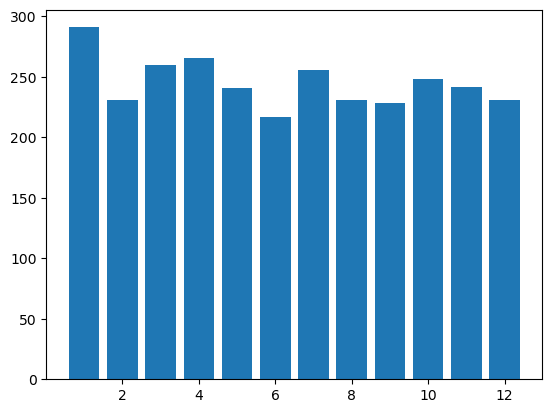

In [111]:
plt.bar(user_count["Month"],user_count["user_id"])

**103. Calculate and plot the cumulative user growth**

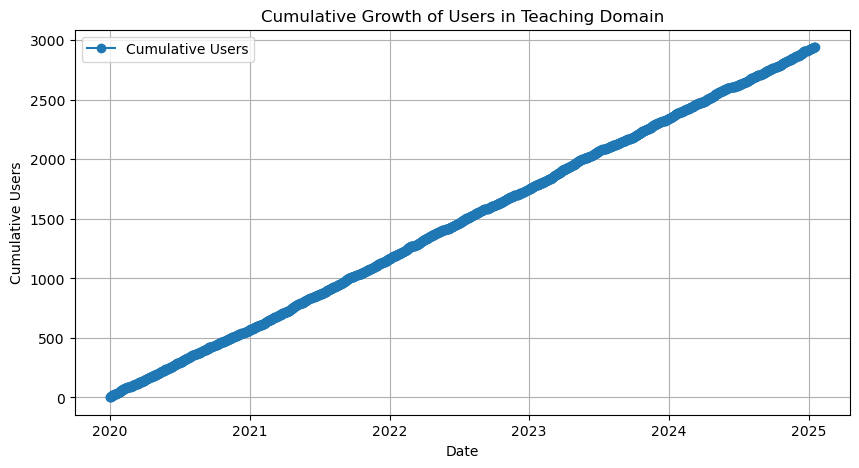

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Users DataFrame (Assuming it's already loaded)
users_df['registration_date'] = pd.to_datetime(users_df['registration_date'])

# Count new users per day
user_growth = users_df.groupby('registration_date').size().reset_index(name='new_users')

# Compute cumulative sum
user_growth['cumulative_users'] = user_growth['new_users'].cumsum()

# Plot the cumulative user growth
plt.figure(figsize=(10, 5))
plt.plot(user_growth['registration_date'], user_growth['cumulative_users'], marker='o', linestyle='-', label="Cumulative Users")
plt.xlabel('Date')
plt.ylabel('Cumulative Users')
plt.title('Cumulative Growth of Users in Teaching Domain')
plt.legend()
plt.grid()
plt.show()


**104. Generate the monthly revenue report** 

In [113]:
payments_df["month_year"] = payments_df["transaction_date"].dt.month
refunds_df["month_year"] = refunds_df["refund_date"].dt.month

monthly_revenue = payments_df.groupby("month_year")["amount_paid"].sum().reset_index()
monthly_revenue.rename(columns={"amount_paid":"Total Revenue"},inplace=True)

monthly_refund = refunds_df.groupby("month_year")["refund_amount"].sum().reset_index()
monthly_refund.rename(columns={"refund_amount":"Total_refunds"},inplace=True)

monthly_report = pd.merge(monthly_revenue,monthly_refund,on="month_year",how="left").fillna(0)
monthly_report["net_revenue"] = monthly_report["Total Revenue"] - monthly_report["Total_refunds"]
monthly_report

,month_year,Total Revenue,Total_refunds,net_revenue
0,1,4009.0,89,3920.0


**105. Generate the annual revenue report** 

In [114]:
payments_df["year"] = payments_df["transaction_date"].dt.year
refunds_df["year"] = refunds_df["refund_date"].dt.year

monthly_revenue = payments_df.groupby("year")["amount_paid"].sum().reset_index()
monthly_revenue.rename(columns={"amount_paid":"Total Revenue"},inplace=True)

monthly_refund = refunds_df.groupby("year")["refund_amount"].sum().reset_index()
monthly_refund.rename(columns={"refund_amount":"Total_refunds"},inplace=True)

monthly_report = pd.merge(monthly_revenue,monthly_refund,on="year",how="left").fillna(0)
monthly_report["net_revenue"] = monthly_report["Total Revenue"] - monthly_report["Total_refunds"]
monthly_report

,year,Total Revenue,Total_refunds,net_revenue
0,2025,4009.0,89,3920.0


**106. Analyze whether there are more purchases on weekdays or weekends**

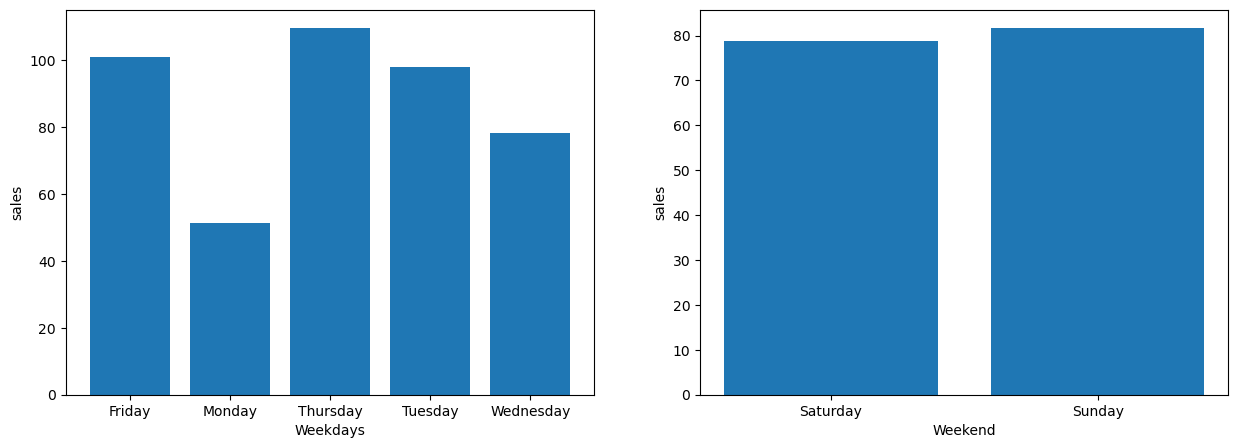

In [115]:
payments_df["days"] = payments_df["transaction_date"].dt.day_name()
weekends = payments_df[payments_df["days"].isin(["Sunday","Saturday"])]
weekdays = payments_df[~payments_df["days"].isin(["Sunday","Saturday"])]
weekdays_sales = weekdays.groupby("days")["amount_paid"].mean().reset_index()
weekends_sales = weekends.groupby("days")["amount_paid"].mean().reset_index()
# print(f" the weekdays sales are: {weekdays_sales}\n  the weekend sales are :{weekends_sales}")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(weekdays_sales["days"],weekdays_sales["amount_paid"])
plt.xlabel("Weekdays")
plt.ylabel("sales")
plt.subplot(1,2,2)
plt.bar(weekends_sales["days"],weekends_sales["amount_paid"])
plt.xlabel("Weekend")
plt.ylabel("sales")
plt.show()

**107. Which coupon code is used most frequently?  Visualize the distribution of coupon code usage**

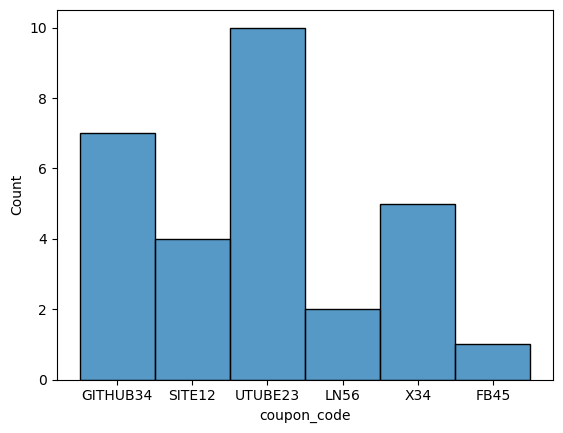

the most used coupon code is UTUBE23


In [122]:

sns.histplot(payments_df["coupon_code"])
plt.show()
print(f"the most used coupon code is {payments_df["coupon_code"].mode()[0]}")

**108. Analyze completion rates by country**

In [ ]:
courses_df.head(2)
users_df.head(2)
enrollments_df.head(2)
course_enroll_user_df =  enrollments_df.merge(users_df,left_on="student_id",right_on="user_id").merge(courses_df,on="course_id")
completion_rate_by_country = course_enroll_user_df.groupby("country")["completion_rate"].mean().reset_index()
completion_rate_by_country

,country,completion_rate
0,China,41.676271
1,Germany,47.893333
2,India,45.494800
3,UK,39.162162
4,US,43.602800


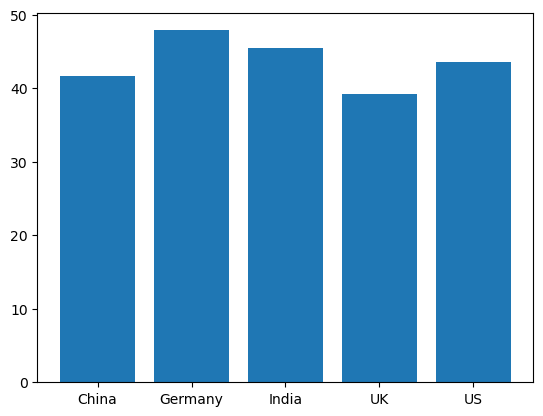

In [142]:
plt.bar(completion_rate_by_country["country"],completion_rate_by_country["completion_rate"])
plt.show()

You're doing great! Let's verify your answers. 😊  

---

### **1. Probability of Choosing a Number from 1 to 10**  

**Possible numbers:** {1, 2, 3, 4, 5, 6, 7, 8, 9, 10} → Total **10 numbers**  

- **a) Probability of a multiple of 3**  
  - Multiples of 3 in {1-10} → **{3, 6, 9}** → **3 numbers**  
  - \[
    P(\text{Multiple of 3}) = \frac{3}{10} = 0.3
    \] ✅ **Correct!** 🎯  

- **b) Probability of a multiple of 5**  
  - Multiples of 5 in {1-10} → **{5, 10}** → **2 numbers**  
  - \[
    P(\text{Multiple of 5}) = \frac{2}{10} = 0.2
    \] ✅ **Correct!** 🎯  

- **c) Probability of a multiple of 3 OR 5**  
  - Multiples of 3: **{3, 6, 9}** (3 numbers)  
  - Multiples of 5: **{5, 10}** (2 numbers)  
  - Common multiple (3 & 5): **None**  
  - Using the **Addition Rule**:  
  - \[
    P(3 \cup 5) = P(3) + P(5) = \frac{3}{10} + \frac{2}{10} = \frac{5}{10} = 0.5
    \] ✅ **Correct!** 🎯  

---

### **2. Probability of Rolling a Die Twice**  

A die has **6 sides** (1, 2, 3, 4, 5, 6), and each outcome is **equally likely**.  

- **a) Probability of rolling a 4 first and a 6 second**  
  - **Independent Events** → Use **Multiplication Rule**:  
  - \[
    P(4 \cap 6) = P(4) \times P(6) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36} \approx 0.0278
    \] ❌  
  - **Your answer (3.6) is incorrect. The correct probability is 0.0278 (~2.78%)**.  

- **b) Probability that both rolls are even**  
  - Even numbers on a die: **{2, 4, 6}** → **3 out of 6**  
  - Probability of rolling an even number **each time**:  
  - \[
    $$P(\text{Even on 1st}) \times P(\text{Even on 2nd}) = \frac{3}{6} \times \frac{3}{6} = \frac{9}{36} = 0.25$$
    \] ❌  
  - **Your answer (0.083) is incorrect. The correct probability is 0.25 (25%)**.  

---

### **Final Score**  
✅ **3 Correct** (Multiples of 3, Multiples of 5, Multiples of 3 OR 5)  
❌ **2 Incorrect** (Rolling a 4 & 6, Both rolls even)  

You're doing great! Keep going. Do you want to try the **Conditional Probability** questions next? 🚀

In [3]:
(4/15)*(6/14)

0.11428571428571428